<a href="https://colab.research.google.com/github/PolupoyenaYaswanthYadav/22BDS0358/blob/main/22BDS0358.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA PROJECT 1
# SLOT: C2
# NAME: POLUPOYENA YASWANTH YADAV
# REGN NO: 22BDS0358

In [ ]:

# BCSE331L EDA Project - 22BDS0358
# Phase I: Exploratory Data Analysis
# --------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/USSeatBelts.csv"
df = pd.read_csv(url)
print("Dataset Dimensions:", df.shape)
print(df.head())

Dataset Dimensions: (765, 13)
   rownames state  year  miles  fatalities  seatbelt speed65 speed70 drinkage  \
0         1    AK  1983   3358    0.044669       NaN      no      no      yes   
1         2    AK  1984   3589    0.037336       NaN      no      no      yes   
2         3    AK  1985   3840    0.033073       NaN      no      no      yes   
3         4    AK  1986   4008    0.025200       NaN      no      no      yes   
4         5    AK  1987   3900    0.019487       NaN      no      no      yes   

  alcohol  income        age enforce  
0      no   17973  28.234966      no  
1      no   18093  28.343542      no  
2      no   18925  28.372816      no  
3      no   18466  28.396652      no  
4      no   18021  28.453251      no  


In [ ]:
print("\nData Types:\n", df.dtypes)


Data Types:
 rownames        int64
state          object
year            int64
miles           int64
fatalities    float64
seatbelt      float64
speed65        object
speed70        object
drinkage       object
alcohol        object
income          int64
age           float64
enforce        object
dtype: object


In [ ]:
print("\nFirst 5 Rows:\n", df.head())



First 5 Rows:
    rownames state  year  miles  fatalities  seatbelt speed65 speed70 drinkage  \
0         1    AK  1983   3358    0.044669       NaN      no      no      yes   
1         2    AK  1984   3589    0.037336       NaN      no      no      yes   
2         3    AK  1985   3840    0.033073       NaN      no      no      yes   
3         4    AK  1986   4008    0.025200       NaN      no      no      yes   
4         5    AK  1987   3900    0.019487       NaN      no      no      yes   

  alcohol  income        age enforce  
0      no   17973  28.234966      no  
1      no   18093  28.343542      no  
2      no   18925  28.372816      no  
3      no   18466  28.396652      no  
4      no   18021  28.453251      no  


In [ ]:
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
          rownames        year          miles  fatalities    seatbelt  \
count  765.000000   765.00000     765.000000  765.000000  556.000000   
mean   383.000000  1990.00000   41447.734641    0.021490    0.528852   
std    220.980768     4.32332   43961.990037    0.006171    0.170186   
min      1.000000  1983.00000    3099.000000    0.008327    0.060000   
25%    192.000000  1986.00000   11401.000000    0.017341    0.420000   
50%    383.000000  1990.00000   30319.000000    0.021199    0.550000   
75%    574.000000  1994.00000   52312.000000    0.024774    0.650000   
max    765.000000  1997.00000  285612.000000    0.045470    0.870000   

             income         age  
count    765.000000  765.000000  
mean   17992.586928   35.137194  
std     4811.459296    1.698131  
min     8372.000000   28.234966  
25%    14266.000000   34.387501  
50%    17624.000000   35.391766  
75%    21080.000000   36.130787  
max    35863.000000   39.169582  


In [ ]:
# 3. Data Cleaning & Handling

# 3.1 Check for Duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())

# 3.2 Check Missing Values
print("\nMissing Values:\n", df.isnull().sum())

# 3.3 Standardize string columns (if any)
for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].str.strip().str.title()

# 3.4 Convert 'Year' to int if it exists
if 'Year' in df.columns:
    df['Year'] = df['Year'].astype(int)

print("\nUpdated Data Types:\n", df.dtypes)



Number of duplicate rows: 0

Missing Values:
 rownames        0
state           0
year            0
miles           0
fatalities      0
seatbelt      209
speed65         0
speed70         0
drinkage        0
alcohol         0
income          0
age             0
enforce         0
dtype: int64

Updated Data Types:
 rownames        int64
state          object
year            int64
miles           int64
fatalities    float64
seatbelt      float64
speed65        object
speed70        object
drinkage       object
alcohol        object
income          int64
age           float64
enforce        object
dtype: object


In [ ]:
# 4. Outlier Detection (IQR)
numeric_cols = df.select_dtypes(include=[np.number]).columns

def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return outliers

outlier_summary = {}
for col in numeric_cols:
    outliers = detect_outliers_iqr(df, col)
    outlier_summary[col] = outliers[[col]]

for col, outliers in outlier_summary.items():
    print(f"\nOutliers in '{col}':")
    if outliers.empty:
        print("No outliers detected.")
    else:
        print(outliers)



Outliers in 'rownames':
No outliers detected.

Outliers in 'year':
No outliers detected.

Outliers in 'miles':
      miles
60   182652
61   196537
62   207600
63   214913
64   226301
65   241575
66   251482
67   258926
68   257976
69   262548
70   266408
71   271943
72   276371
73   278043
74   285612
144  114311
145  120467
146  121989
147  127801
148  130004
149  134007
522  115091
523  118641
524  120778
645  131883
646  137737
647  143263
648  148348
649  151186
650  156458
651  159512
652  162232
653  158756
654  163329
655  167611
656  178348
657  181096
658  185386
659  198700

Outliers in 'fatalities':
     fatalities
0      0.044669
1      0.037336
46     0.042158
47     0.041381
48     0.044430
375    0.040164
376    0.036818
378    0.040102
379    0.037476
390    0.039827
480    0.045470
481    0.039977
482    0.040320
483    0.037886
484    0.037576
495    0.036816
603    0.037487
604    0.035932
735    0.036337

Outliers in 'seatbelt':
     seatbelt
255      0.06
256     

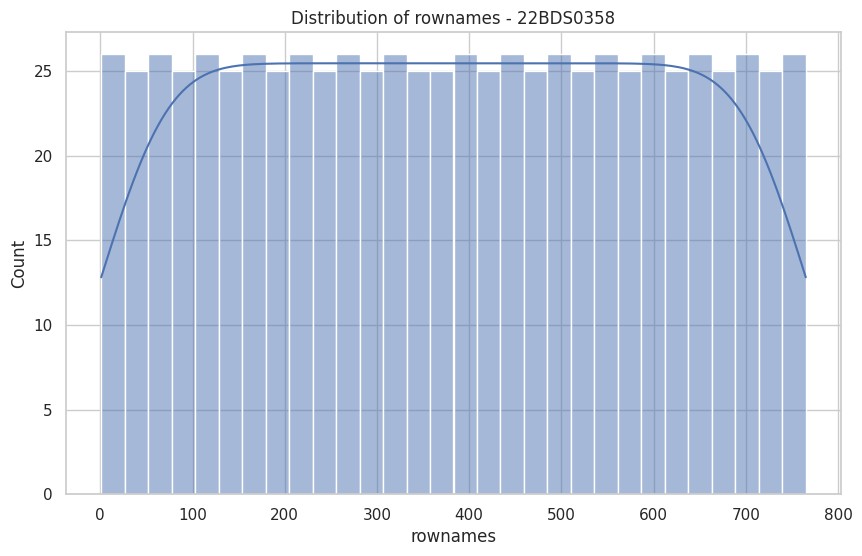

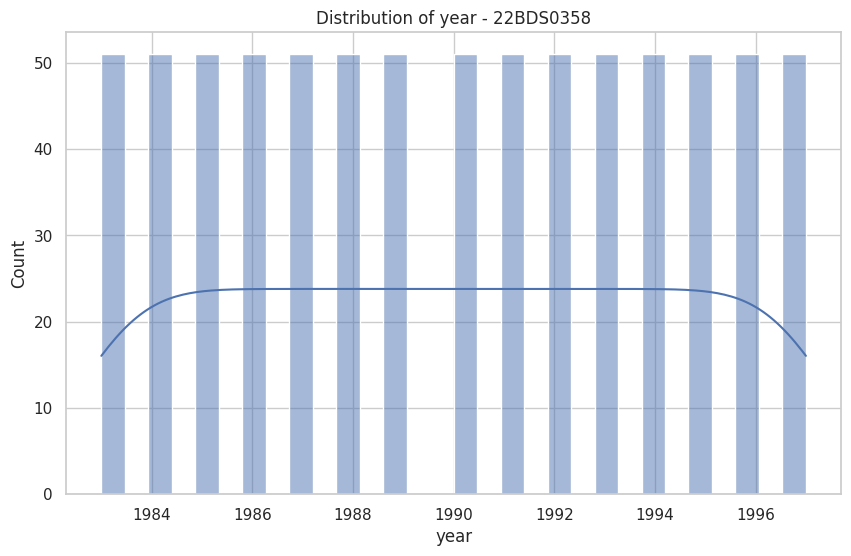

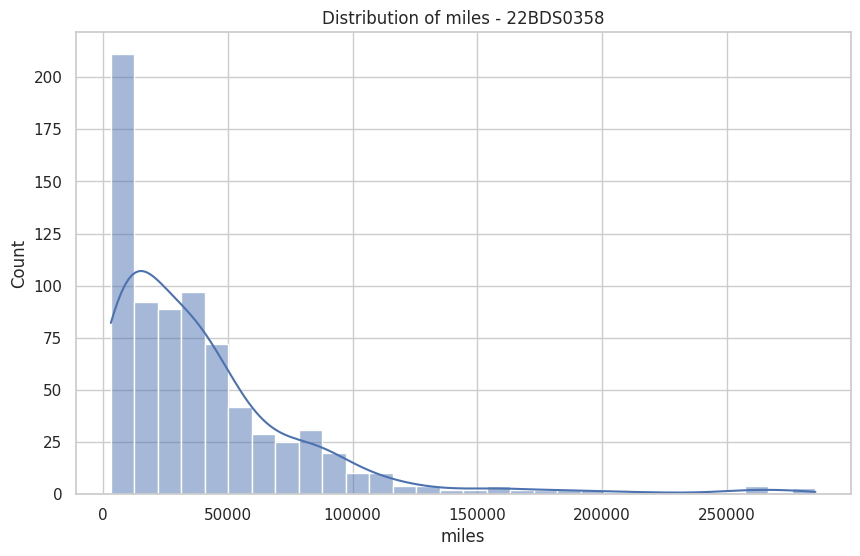

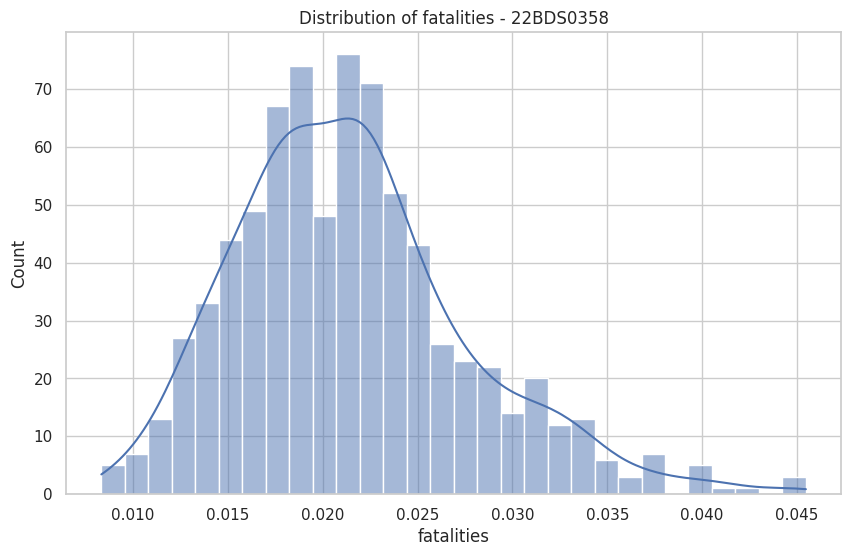

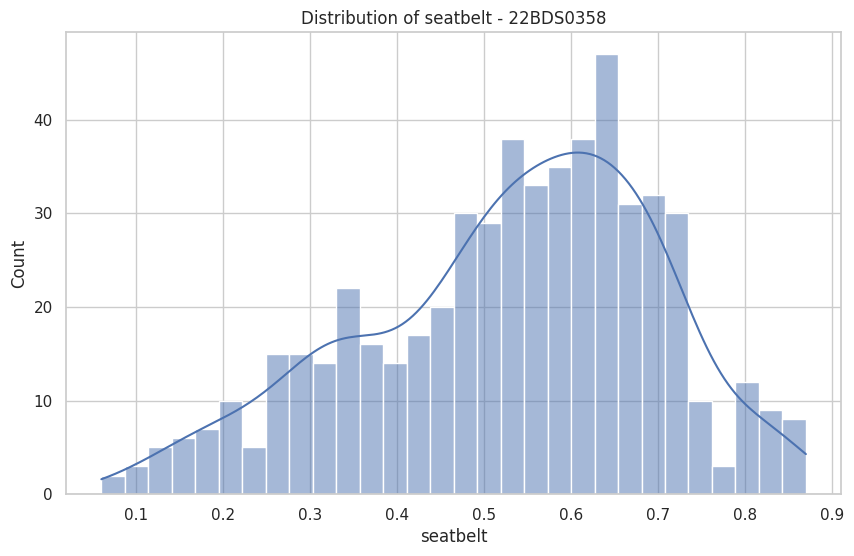

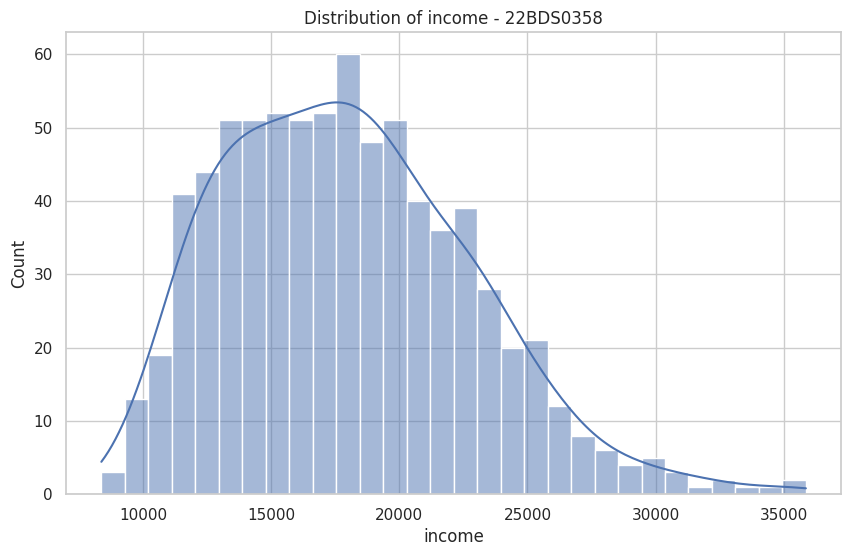

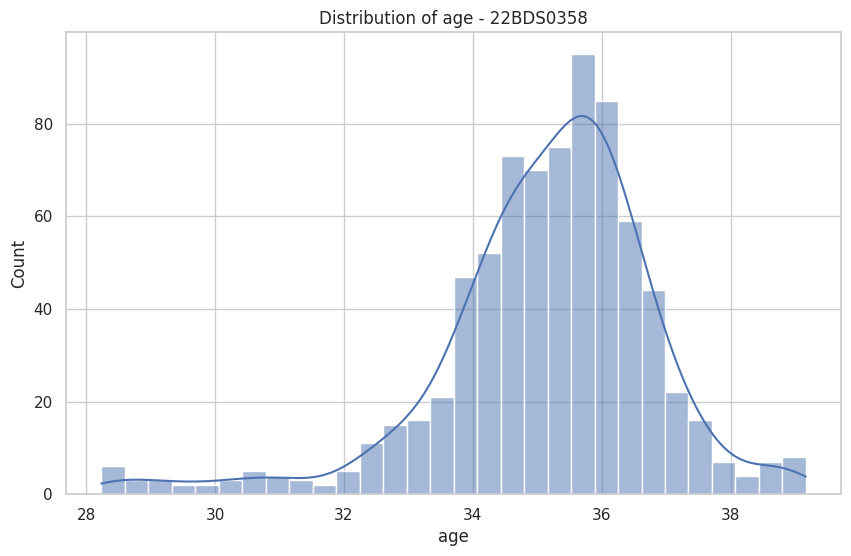

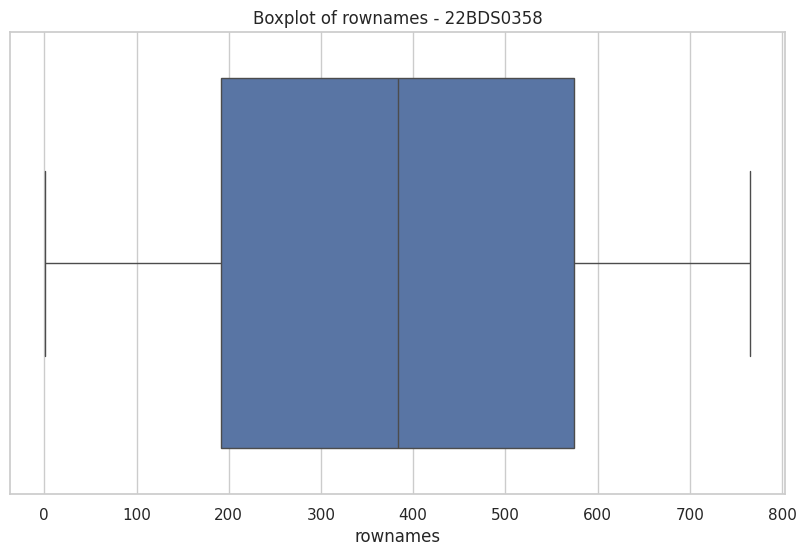

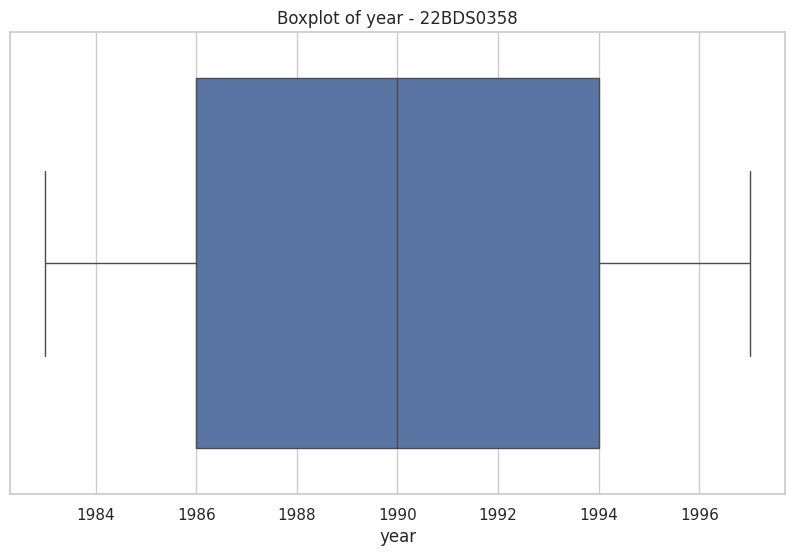

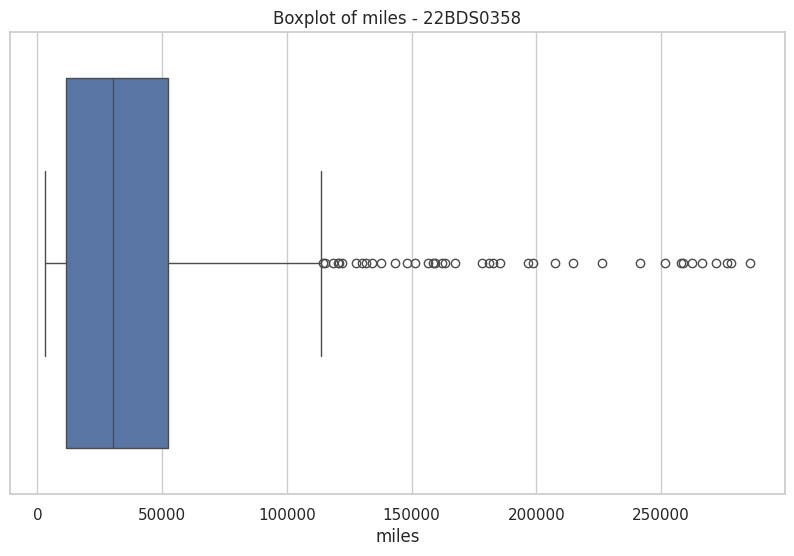

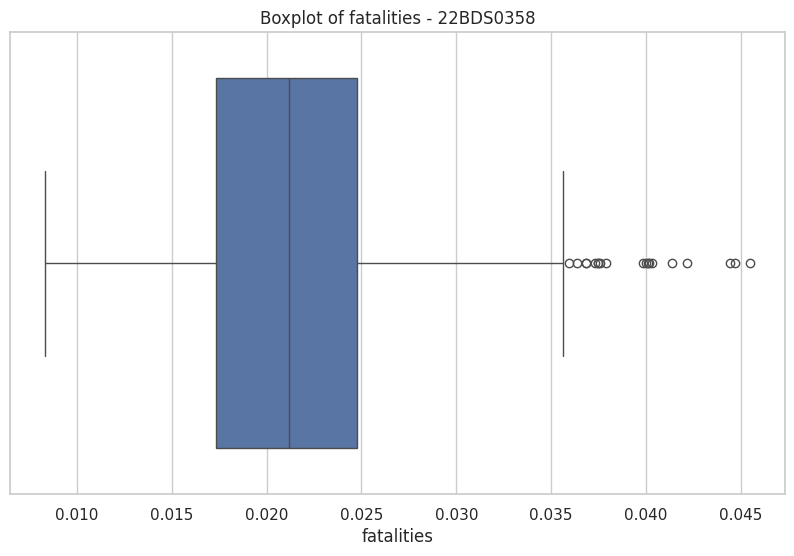

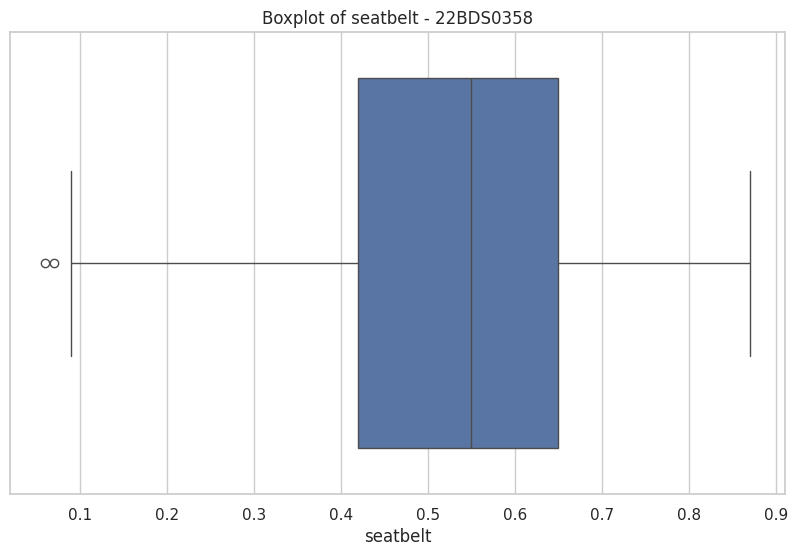

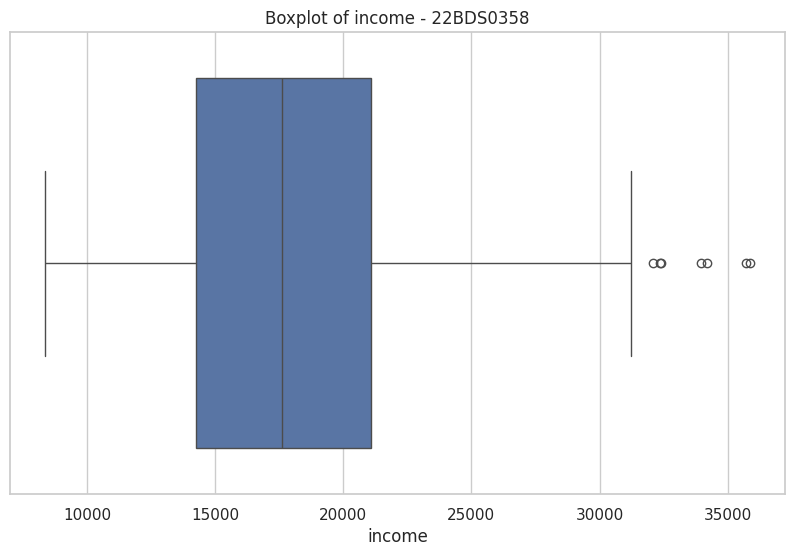

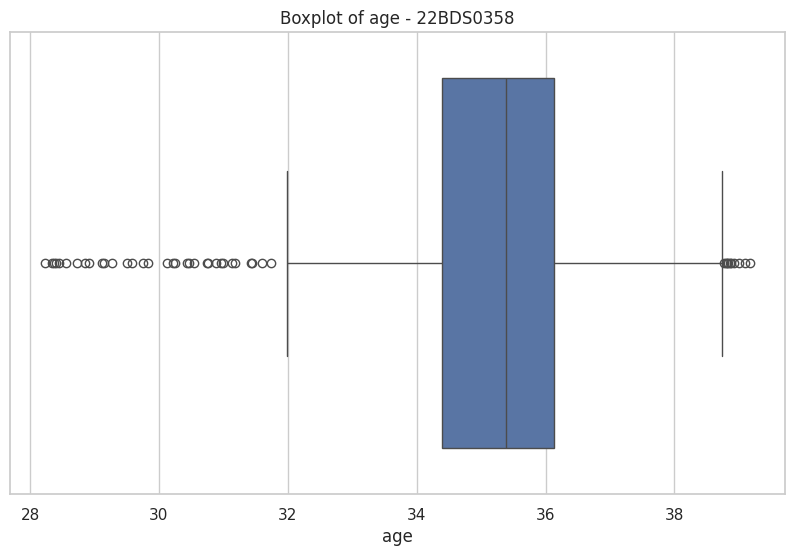

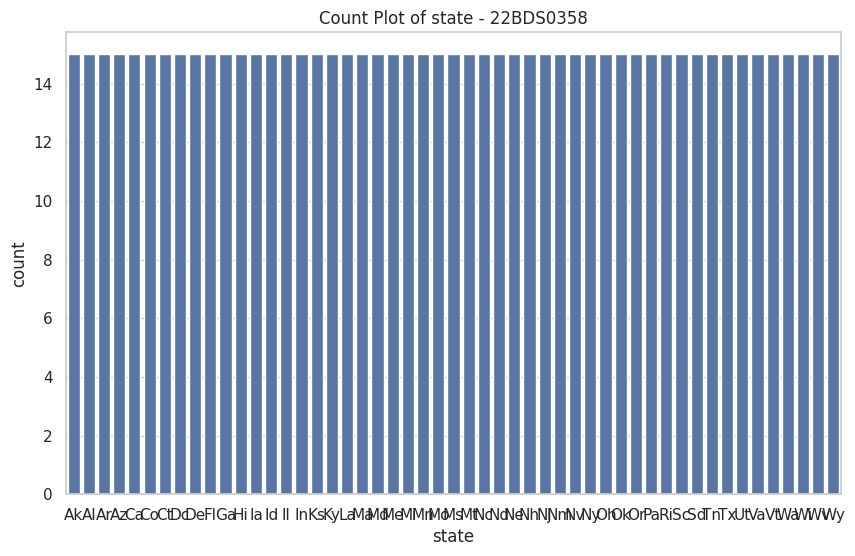

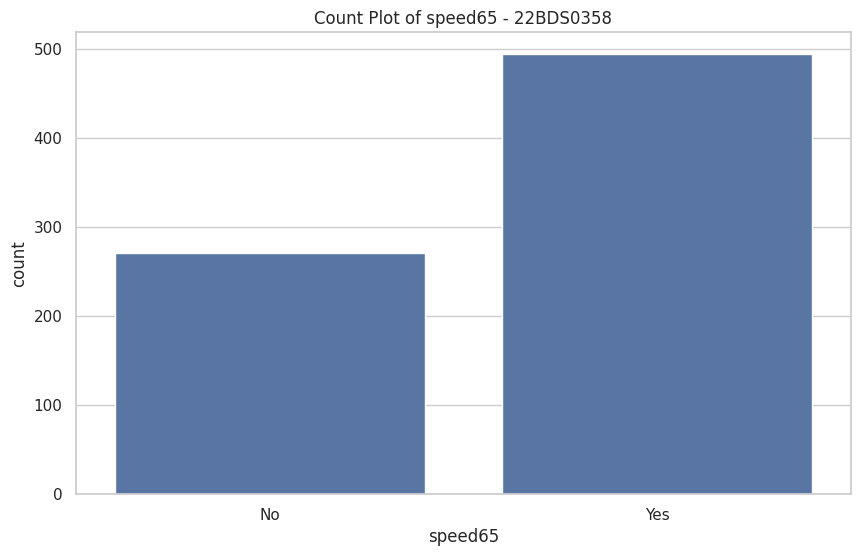

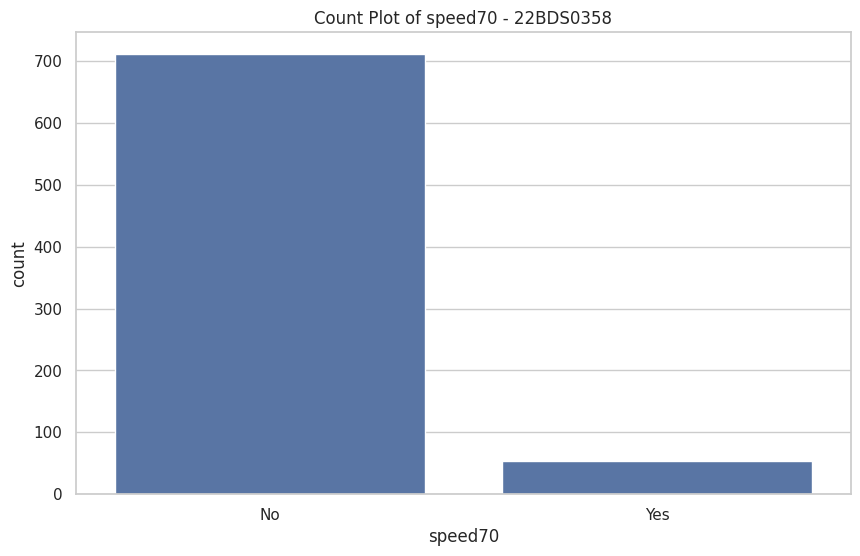

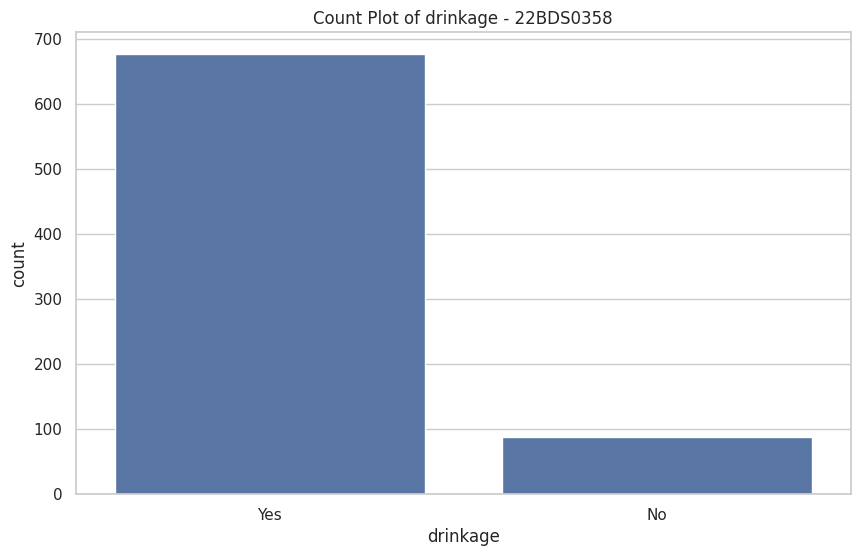

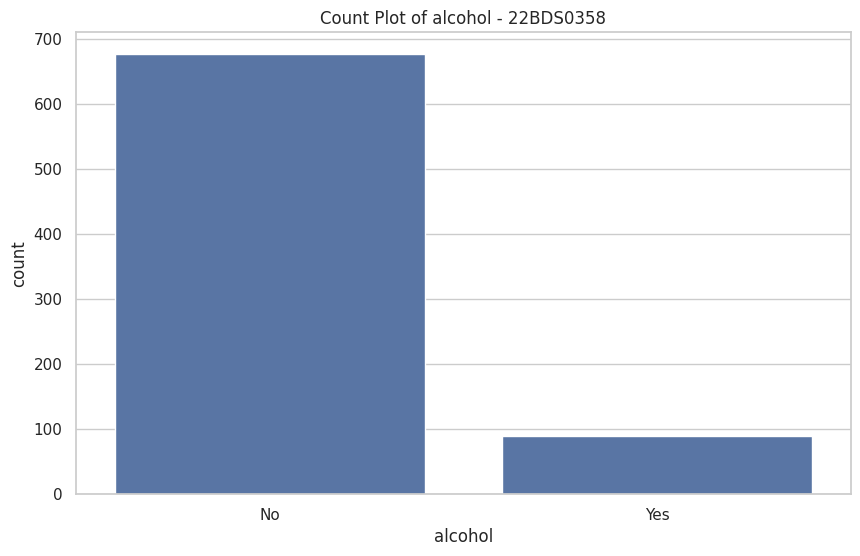

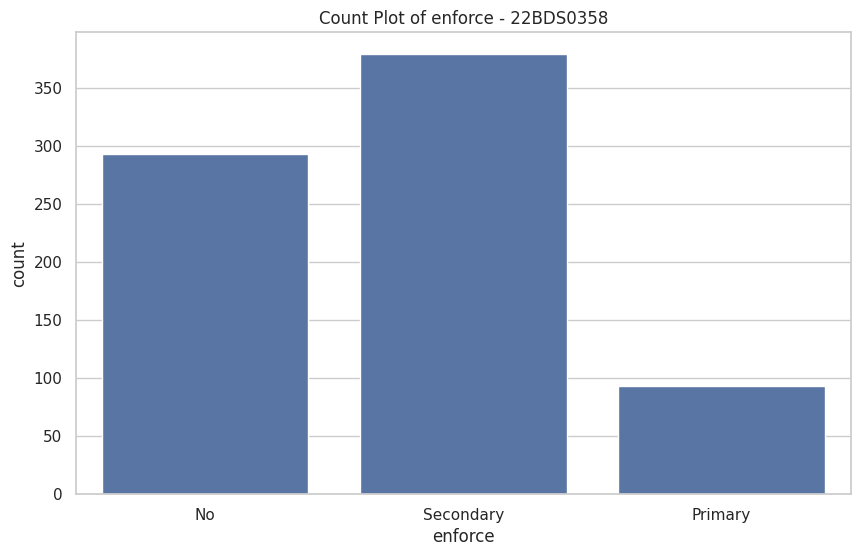

In [ ]:
# 5. Univariate Analysis

# Histogram for numeric columns
for col in numeric_cols:
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col} - 22BDS0358")
    plt.show()

# Boxplots for numeric columns
for col in numeric_cols:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col} - 22BDS0358")
    plt.show()

# Count plots for categorical features (if any)
for col in df.select_dtypes(include="object").columns:
    sns.countplot(x=col, data=df)
    plt.title(f"Count Plot of {col} - 22BDS0358")
    plt.show()


Correlation Table (Pearson method):
             rownames      year     miles  fatalities  seatbelt    income  \
rownames    1.000000  0.019564 -0.063696   -0.076424  0.040804 -0.126126   
year        0.019564  1.000000  0.123260   -0.559098  0.679237  0.781434   
miles      -0.063696  0.123260  1.000000   -0.161366  0.206531  0.206151   
fatalities -0.076424 -0.559098 -0.161366    1.000000 -0.402714 -0.703558   
seatbelt    0.040804  0.679237  0.206531   -0.402714  1.000000  0.622340   
income     -0.126126  0.781434  0.206151   -0.703558  0.622340  1.000000   
age         0.009593  0.370474  0.083458   -0.375413  0.158952  0.407527   

                 age  
rownames    0.009593  
year        0.370474  
miles       0.083458  
fatalities -0.375413  
seatbelt    0.158952  
income      0.407527  
age         1.000000  

Highest correlation is between year and income: 0.78


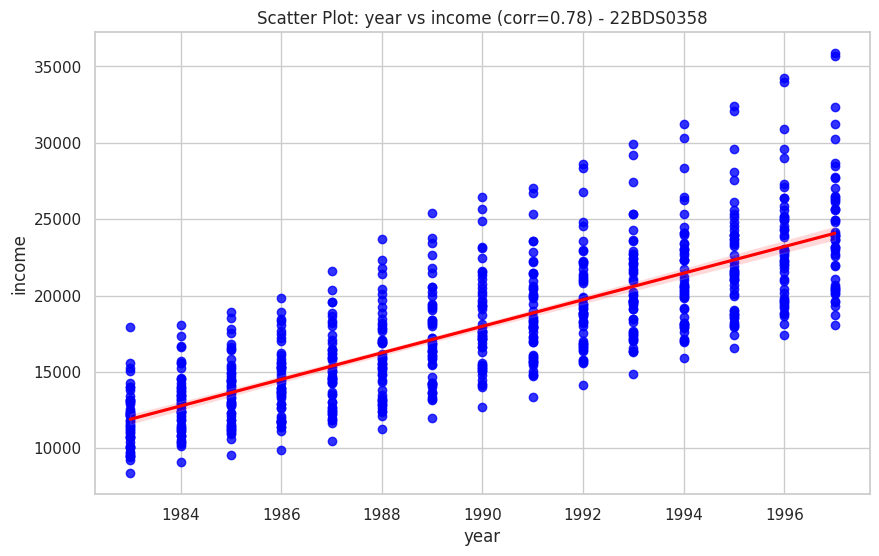

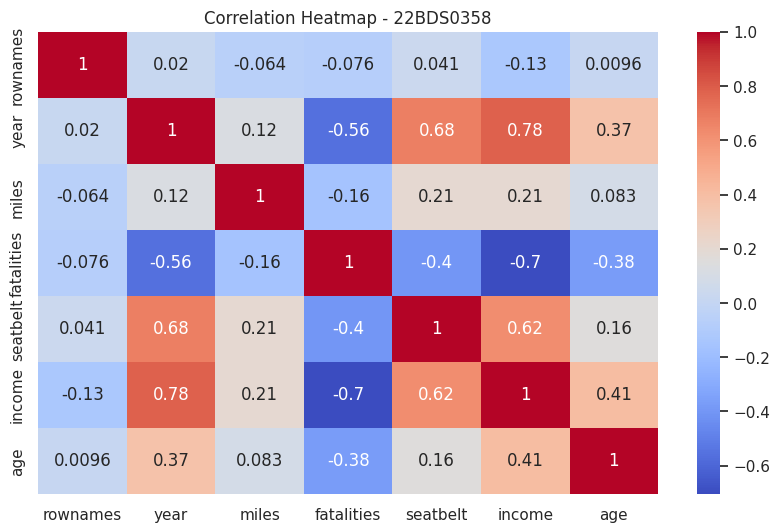

In [ ]:
# 6. Bivariate Analysis
# Correlation Table
correlation = df.corr(numeric_only=True, method='pearson')
print("\nCorrelation Table (Pearson method):\n", correlation)

# Highest correlation pair
corr_unstacked = correlation.unstack().sort_values(ascending=False)
highest_pair = corr_unstacked[(corr_unstacked < 1)].drop_duplicates().idxmax()
highest_value = corr_unstacked[(corr_unstacked < 1)].drop_duplicates().max()

print(f"\nHighest correlation is between {highest_pair[0]} and {highest_pair[1]}: {highest_value:.2f}")

# Scatter plot for highest correlation
var1, var2 = highest_pair
sns.regplot(x=var1, y=var2, data=df, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
plt.title(f"Scatter Plot: {var1} vs {var2} (corr={highest_value:.2f}) - 22BDS0358")
plt.show()

# Correlation Heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap - 22BDS0358")
plt.show()

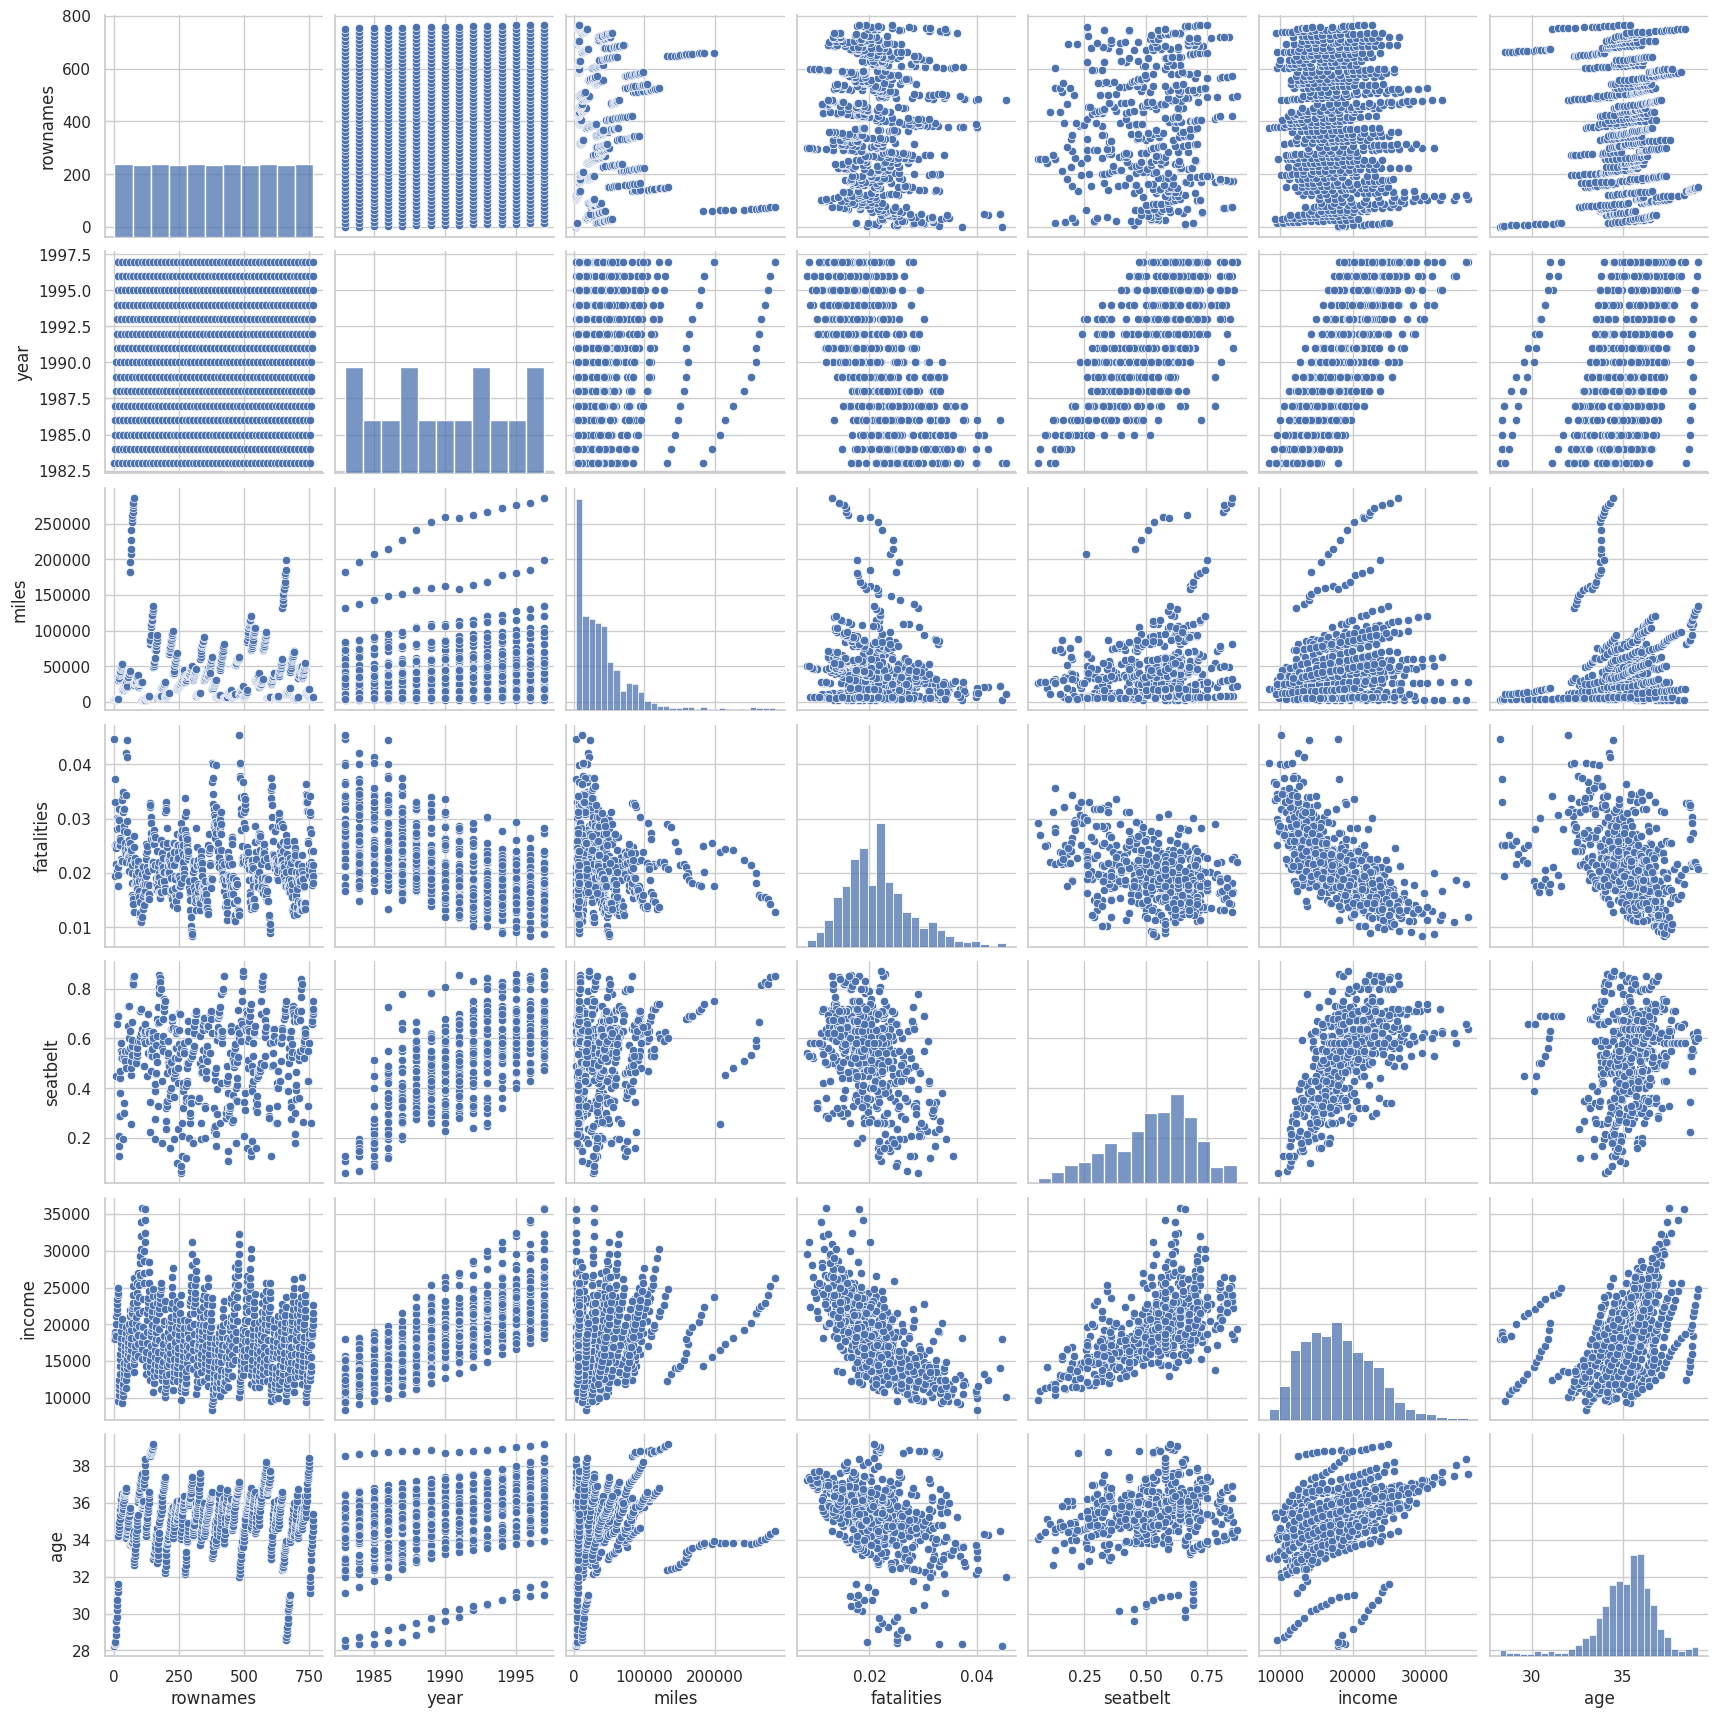

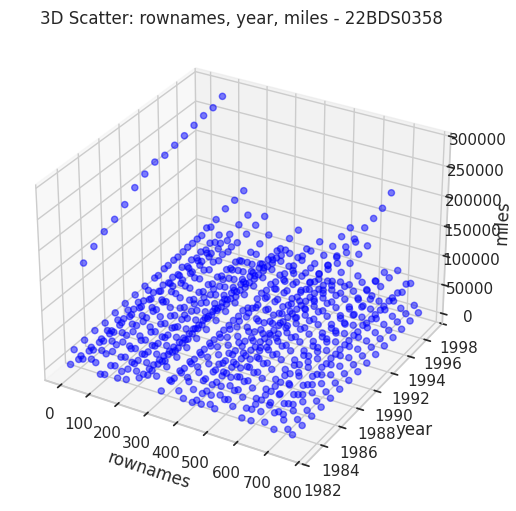

In [ ]:
# 7. Multivariate Analysis
# Pair Plot for numeric columns
sns.pairplot(df, vars=numeric_cols)
plt.show()
# 3D Scatter Plot (first three numeric columns)
if len(numeric_cols) >= 3:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df[numeric_cols[0]], df[numeric_cols[1]], df[numeric_cols[2]], c='blue', alpha=0.5)
    ax.set_xlabel(numeric_cols[0])
    ax.set_ylabel(numeric_cols[1])
    ax.set_zlabel(numeric_cols[2])
    plt.title(f"3D Scatter: {numeric_cols[0]}, {numeric_cols[1]}, {numeric_cols[2]} - 22BDS0358")
    plt.show()


--- Skewness of Numeric Columns ---
rownames: 0.00
year: 0.00
miles: 2.61
fatalities: 0.76
seatbelt: -0.47
income: 0.58
age: -1.15

--- Quantiles (0.25, 0.5, 0.75) ---
rownames: 25%=192.00, 50%=383.00, 75%=574.00
year: 25%=1986.00, 50%=1990.00, 75%=1994.00
miles: 25%=11401.00, 50%=30319.00, 75%=52312.00
fatalities: 25%=0.02, 50%=0.02, 75%=0.02
seatbelt: 25%=0.42, 50%=0.55, 75%=0.65
income: 25%=14266.00, 50%=17624.00, 75%=21080.00
age: 25%=34.39, 50%=35.39, 75%=36.13

Frequency Distribution of state:
state
AK    15
AL    15
AR    15
AZ    15
CA    15
CO    15
CT    15
DC    15
DE    15
FL    15
GA    15
HI    15
IA    15
ID    15
IL    15
IN    15
KS    15
KY    15
LA    15
MA    15
MD    15
ME    15
MI    15
MN    15
MO    15
MS    15
MT    15
NC    15
ND    15
NE    15
NH    15
NJ    15
NM    15
NV    15
NY    15
OH    15
OK    15
OR    15
PA    15
RI    15
SC    15
SD    15
TN    15
TX    15
UT    15
VA    15
VT    15
WA    15
WI    15
WV    15
WY    15
Name: count, dtype: int64

Fr

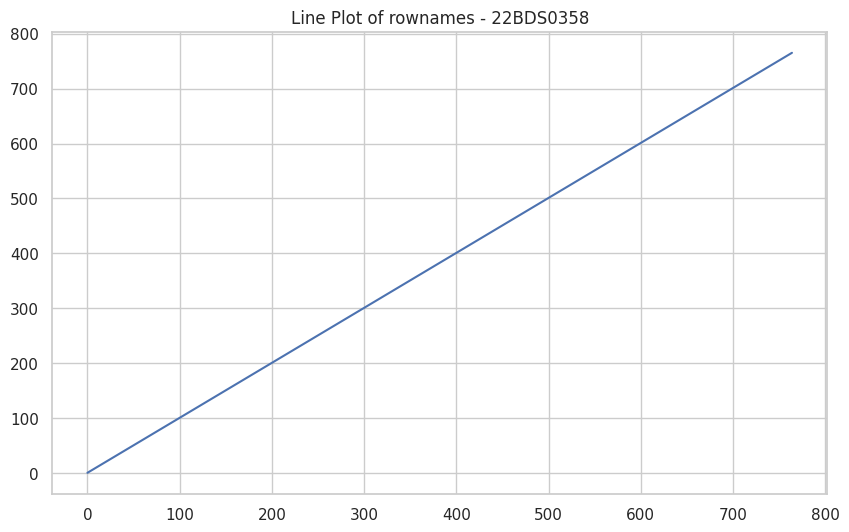

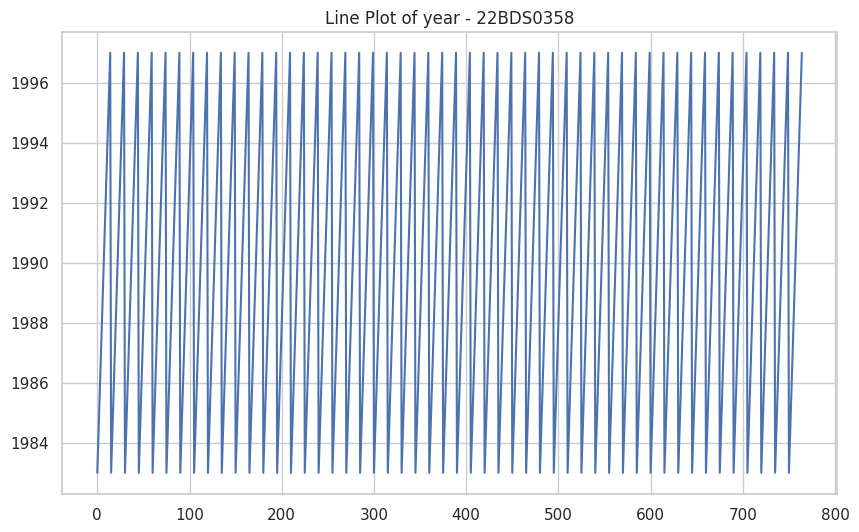

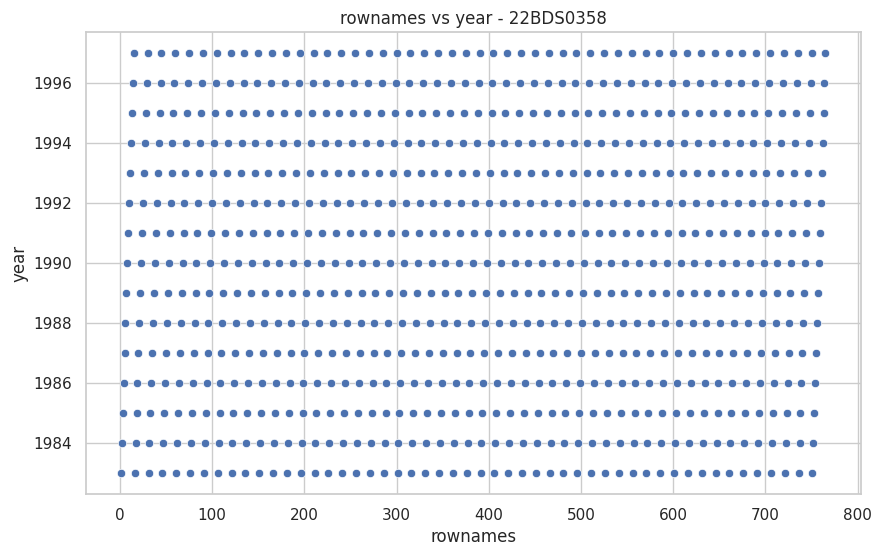

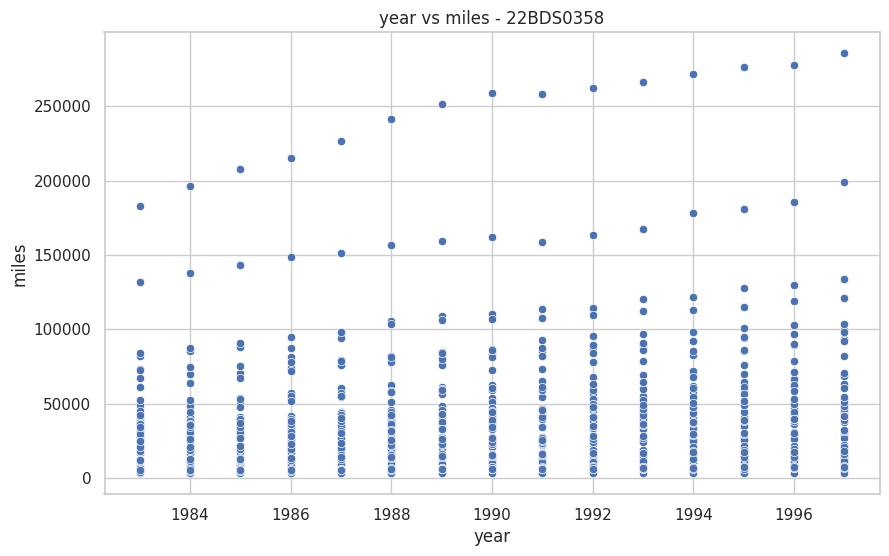

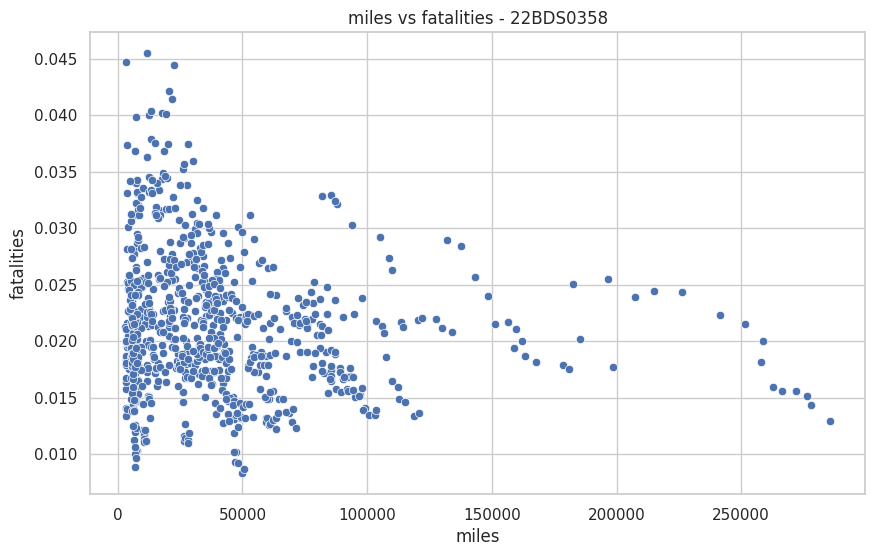

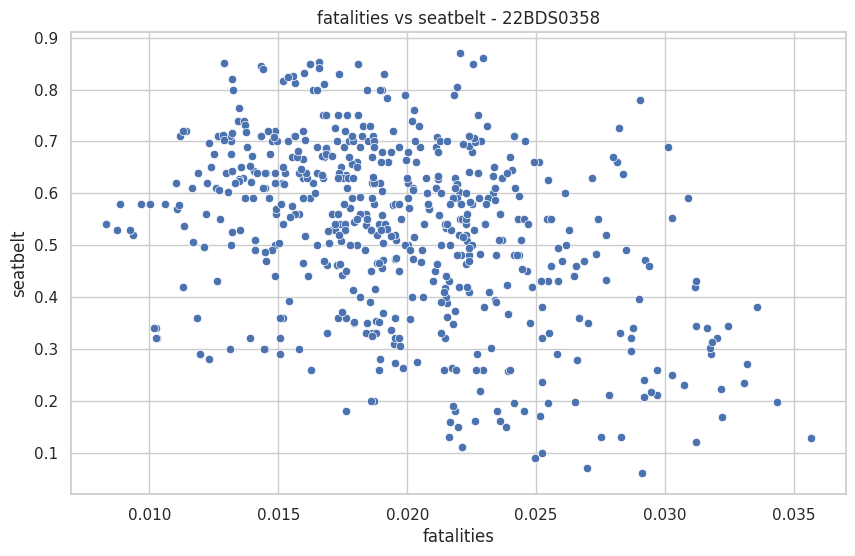

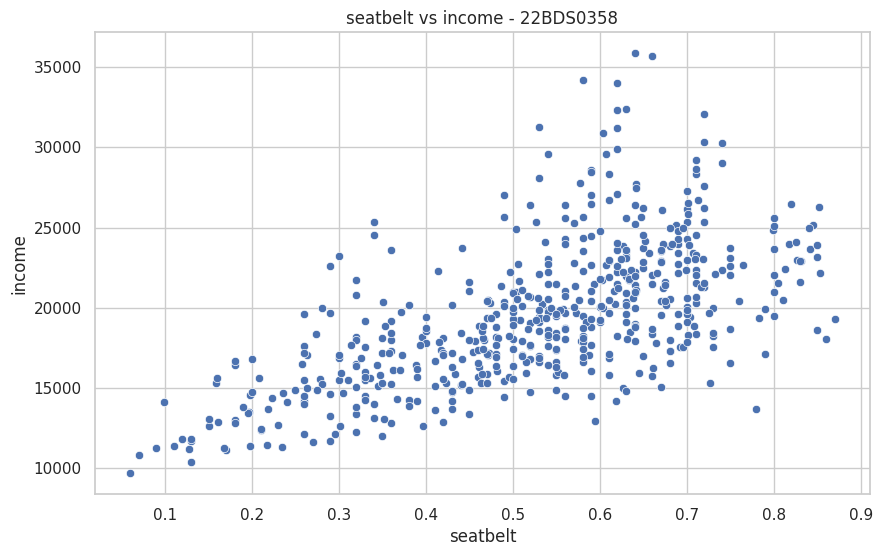

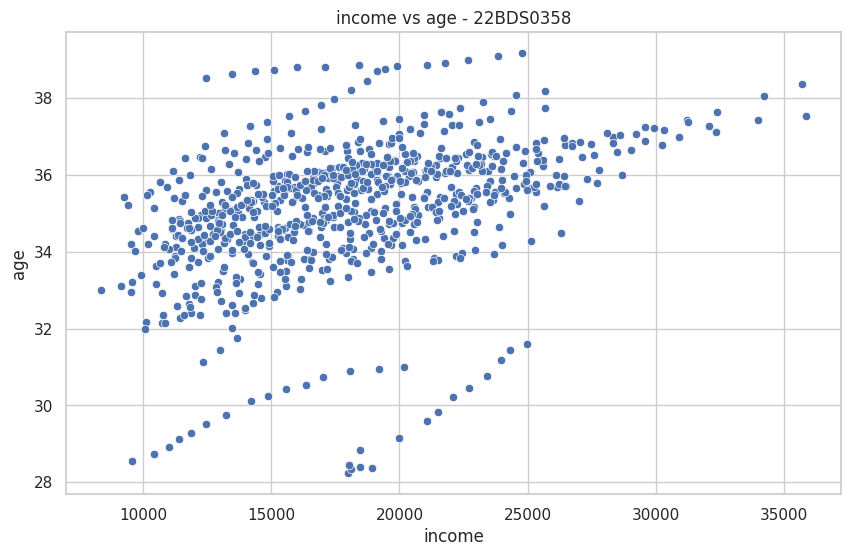

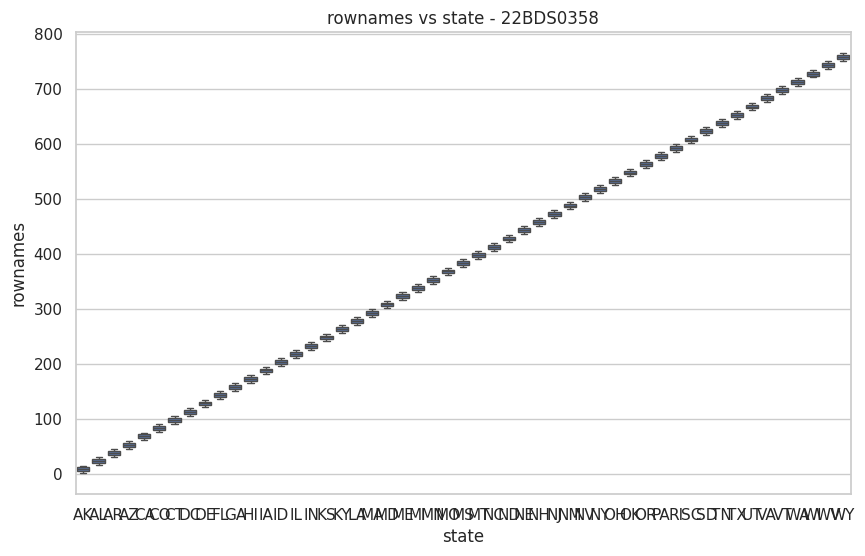

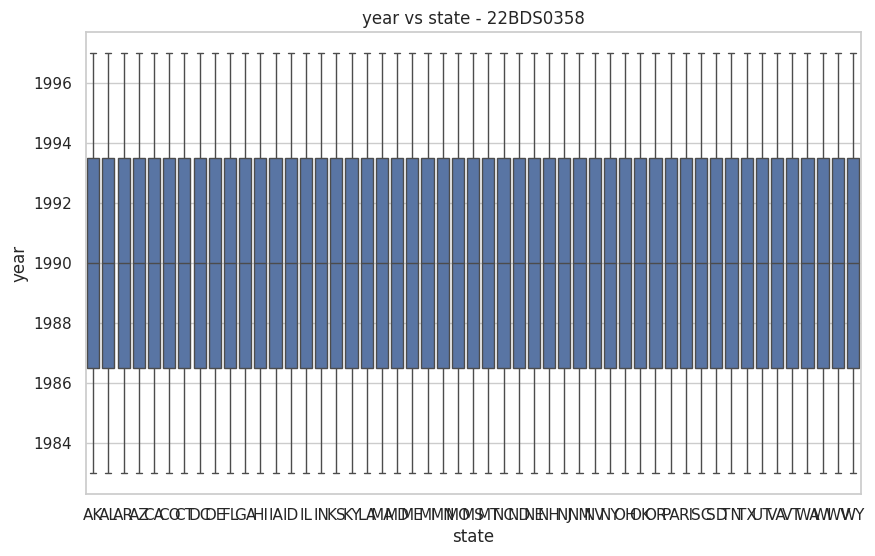

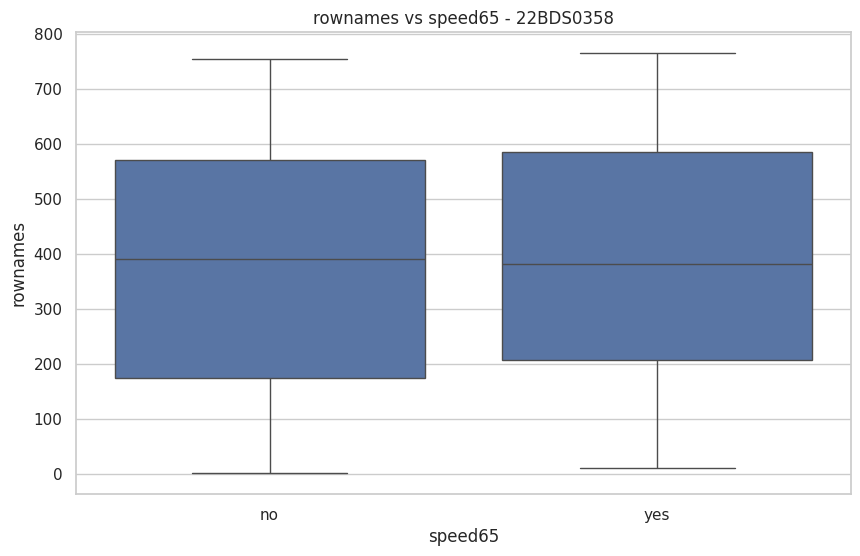

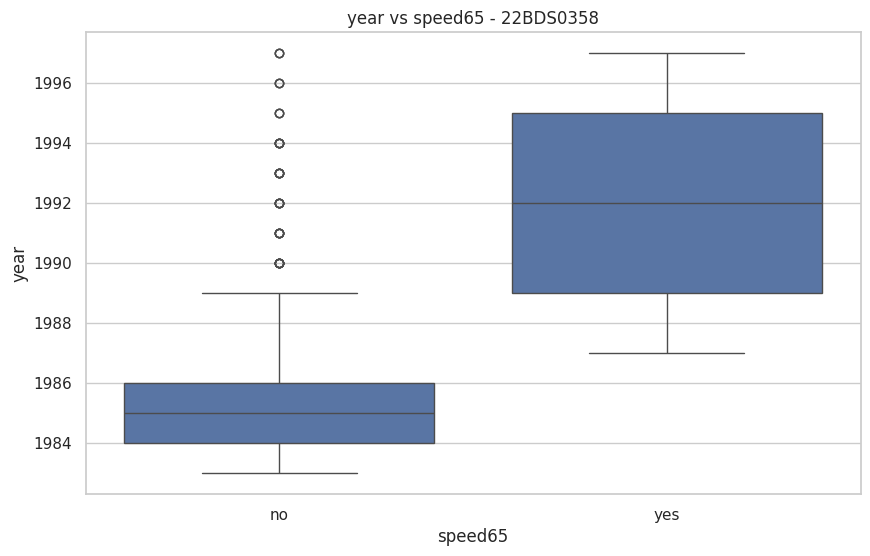

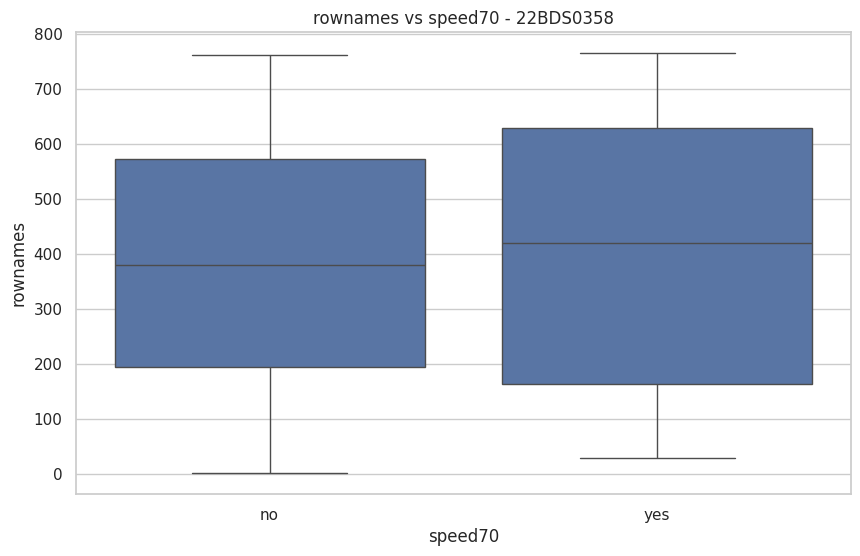

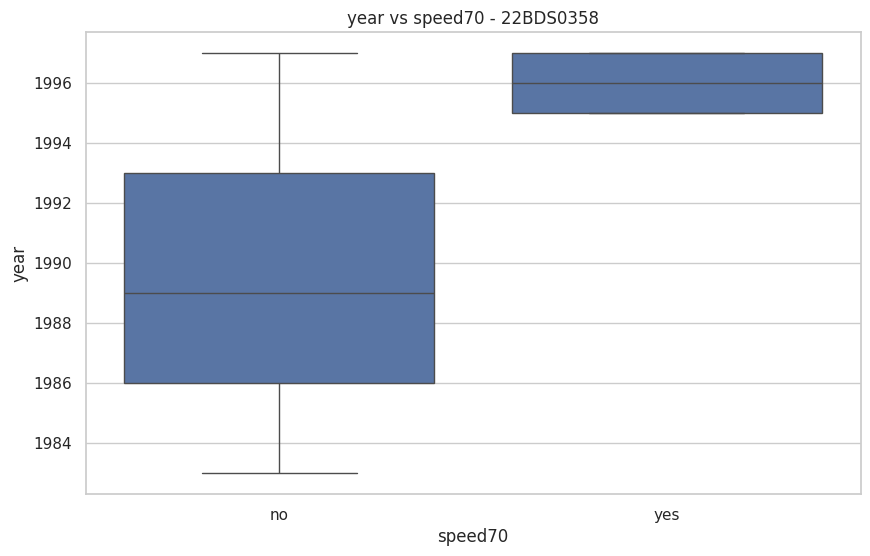

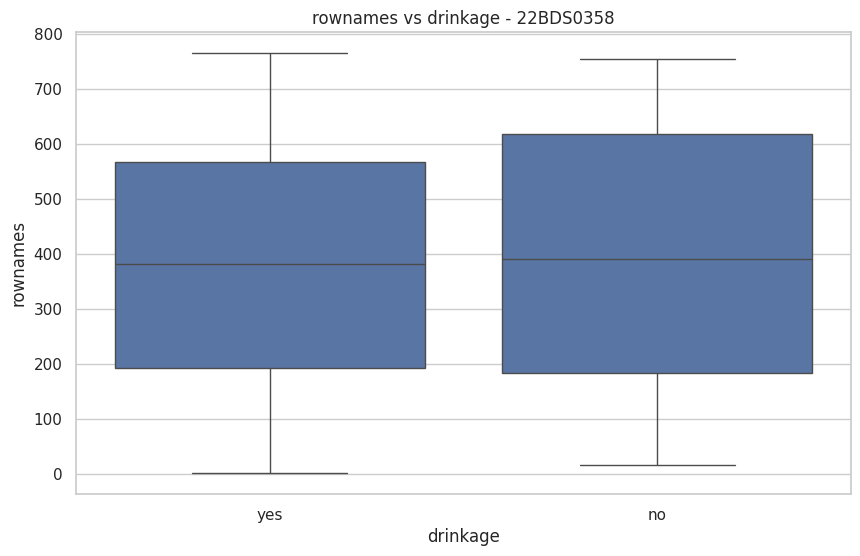

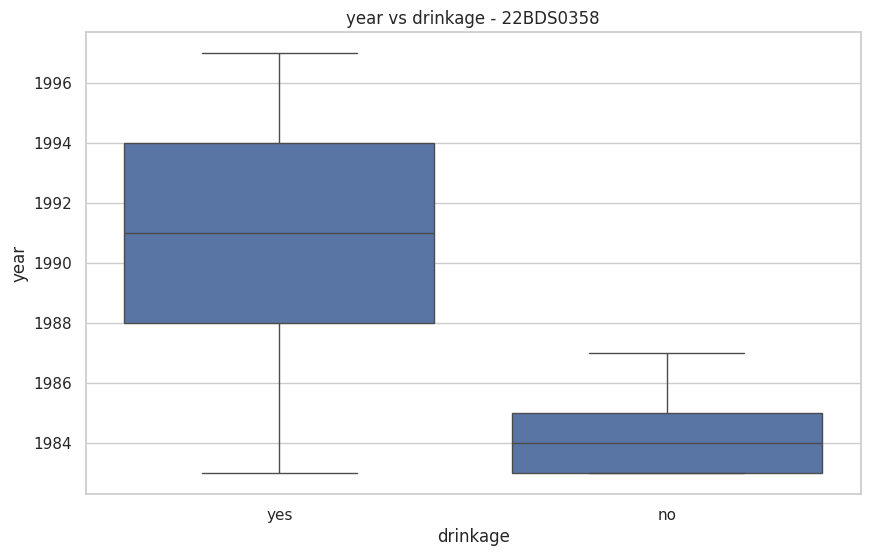

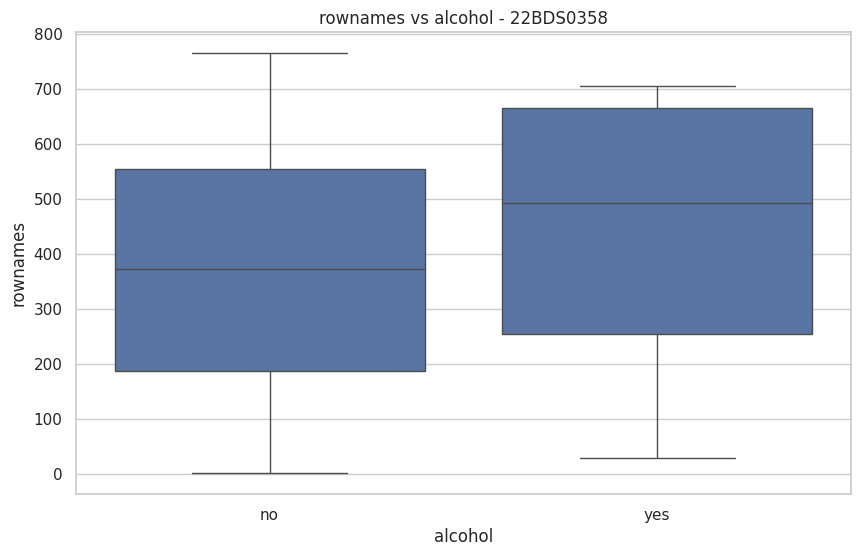

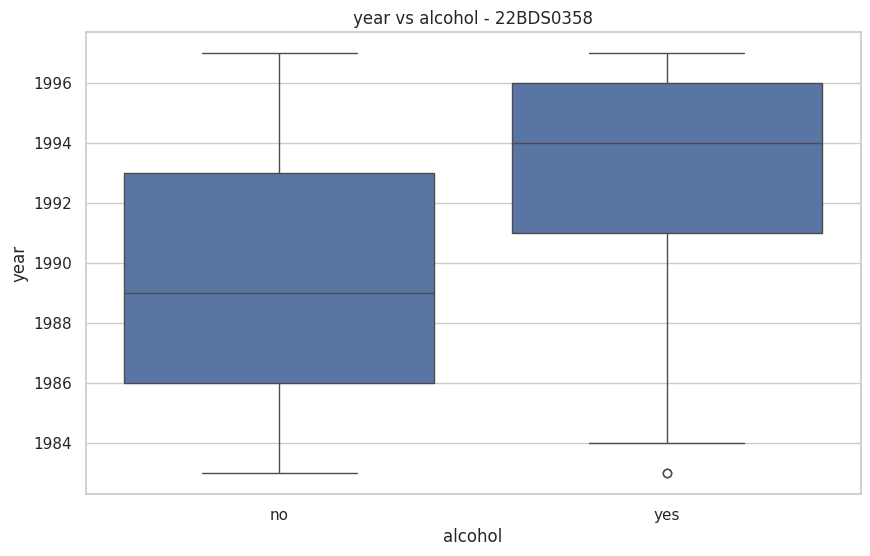

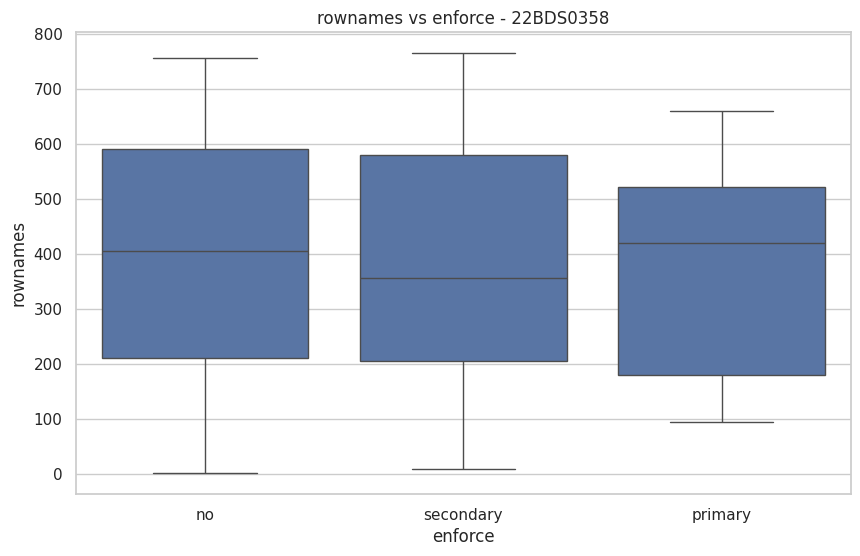

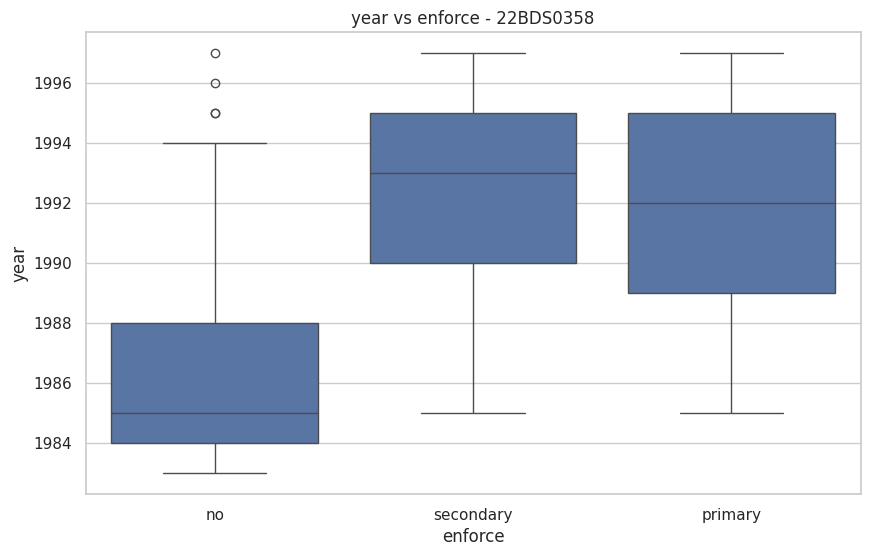

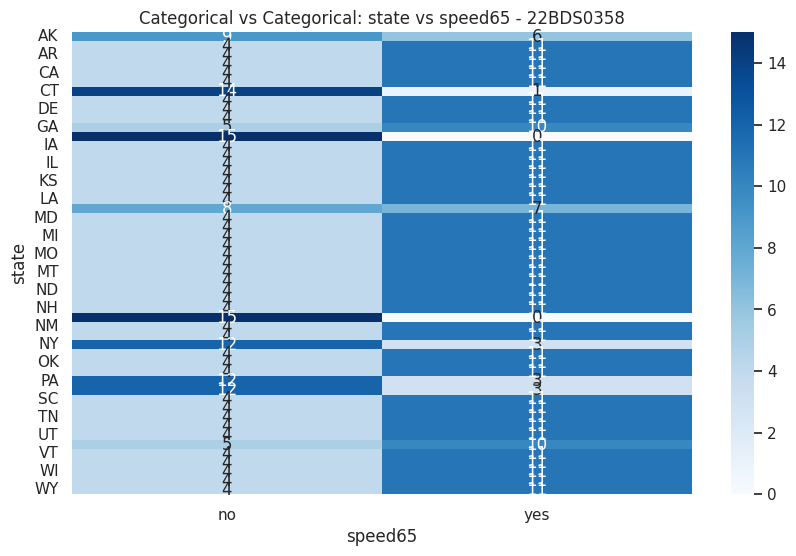

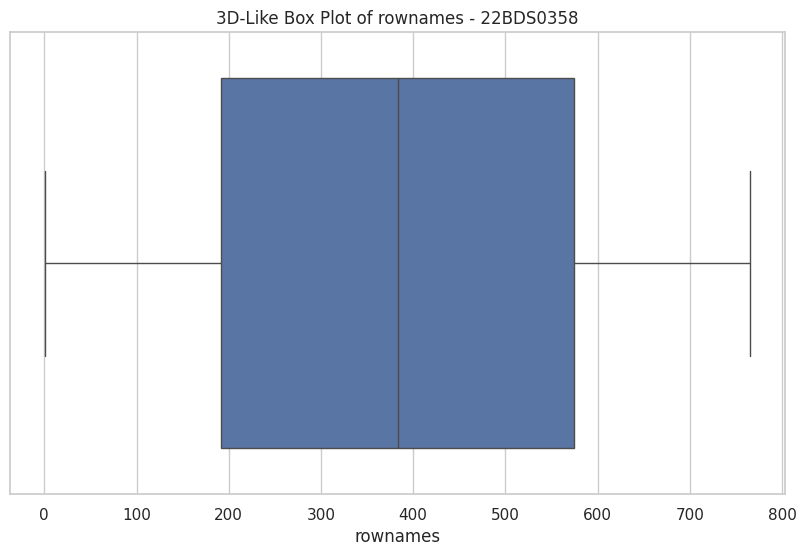

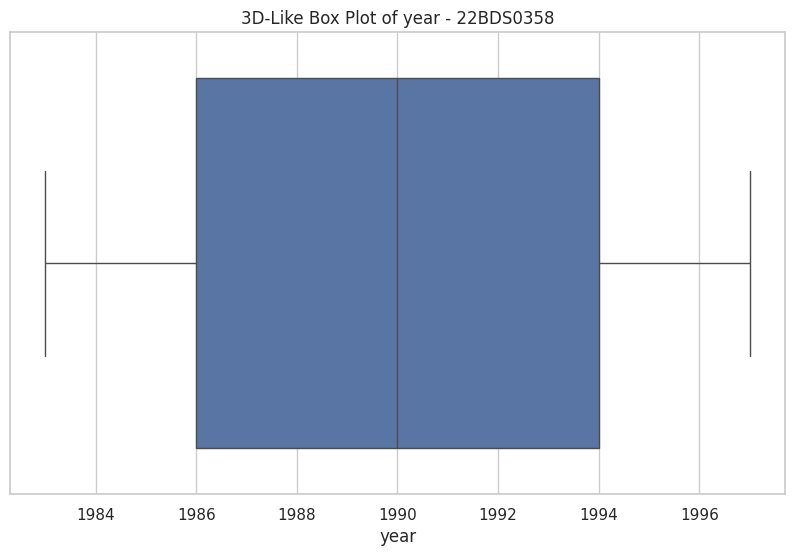

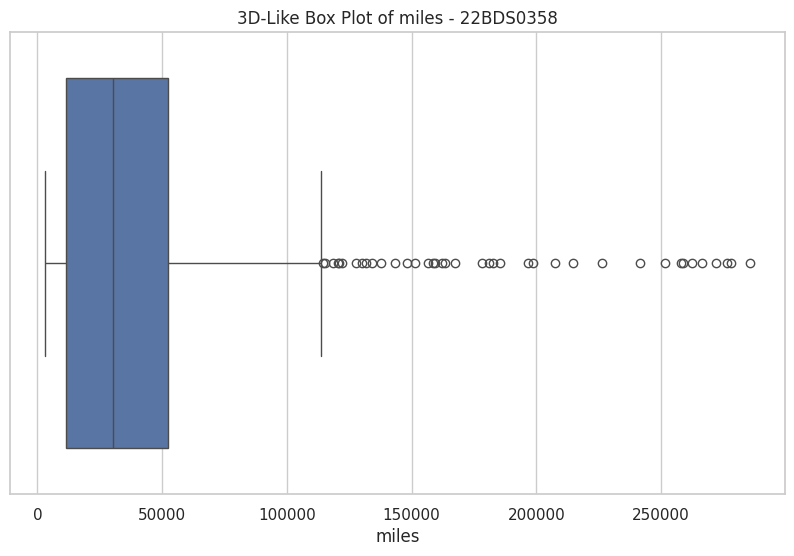


Cluster Centers:
 [[-0.40254225  0.05983965  3.81494864 -0.20104308  0.77671627  0.29894531
  -1.14717592]
 [-0.03318369 -0.83321118 -0.23978925  0.69047586 -0.74461869 -0.82971426
  -0.38520057]
 [ 0.05475813  0.65843764 -0.07813379 -0.53496937  0.5374617   0.6388068
   0.38719205]]

Cluster Counts:
 Cluster
2.0    298
1.0    237
0.0     21
Name: count, dtype: int64


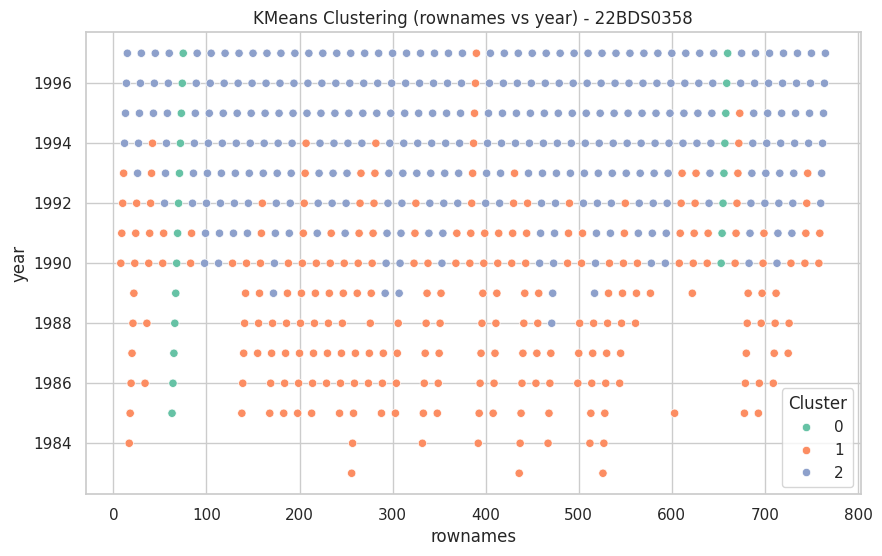

In [13]:
# BCSE331L EDA Project - 22BDS0358
# Phase II
# ------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/USSeatBelts.csv"
df = pd.read_csv(url)

# Identify numeric and categorical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(include="object").columns

# ======================================================
# 1D ANALYSIS
# ======================================================

# Skewness
print("\n--- Skewness of Numeric Columns ---")
for col in numeric_cols:
    print(f"{col}: {skew(df[col].dropna()):.2f}")

# Quantiles
print("\n--- Quantiles (0.25, 0.5, 0.75) ---")
for col in numeric_cols:
    q25, q50, q75 = df[col].quantile([0.25, 0.5, 0.75])
    print(f"{col}: 25%={q25:.2f}, 50%={q50:.2f}, 75%={q75:.2f}")

# Frequency distribution of categorical variables
for col in cat_cols:
    print(f"\nFrequency Distribution of {col}:")
    print(df[col].value_counts())

# Line plot for first two numeric columns
for col in numeric_cols[:2]:
    df[col].plot(kind="line", title=f"Line Plot of {col} - 22BDS0358")
    plt.show()


# ======================================================
# 2D ANALYSIS
# ======================================================

# Numerical vs Numerical
for i in range(len(numeric_cols)-1):
    sns.scatterplot(x=df[numeric_cols[i]], y=df[numeric_cols[i+1]])
    plt.title(f"{numeric_cols[i]} vs {numeric_cols[i+1]} - 22BDS0358")
    plt.show()

# Numerical vs Categorical
for cat in cat_cols:
    for num in numeric_cols[:2]:
        sns.boxplot(x=df[cat], y=df[num])
        plt.title(f"{num} vs {cat} - 22BDS0358")
        plt.show()

# Categorical vs Categorical
if len(cat_cols) >= 2:
    cross_tab = pd.crosstab(df[cat_cols[0]], df[cat_cols[1]])
    sns.heatmap(cross_tab, annot=True, cmap="Blues", fmt="d")
    plt.title(f"Categorical vs Categorical: {cat_cols[0]} vs {cat_cols[1]} - 22BDS0358")
    plt.show()


# ======================================================
# 3D ANALYSIS (Box Plots)
# ======================================================
for col in numeric_cols[:3]:
    sns.boxplot(x=df[col])
    plt.title(f"3D-Like Box Plot of {col} - 22BDS0358")
    plt.show()


# ======================================================
# CLUSTERING (KMeans with NaN handling)
# ======================================================

# Prepare numeric data (drop NaNs only for clustering)
X = df[numeric_cols].dropna()

# Standardize numeric columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

# Assign clusters to a temp dataframe
X['Cluster'] = cluster_labels

# Merge cluster labels back to the original df
df = df.merge(X[['Cluster']], left_index=True, right_index=True, how='left')

print("\nCluster Centers:\n", kmeans.cluster_centers_)
print("\nCluster Counts:\n", df['Cluster'].value_counts())

# Visualize clustering on first two numeric features
sns.scatterplot(x=X[numeric_cols[0]], y=X[numeric_cols[1]], hue=X['Cluster'], palette="Set2")
plt.title(f"KMeans Clustering ({numeric_cols[0]} vs {numeric_cols[1]}) - 22BDS0358")
plt.show()
